In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [5]:
import seaborn as sns
import pandas as pd

In [6]:
import sys

In [7]:
sys.path

['C:\\Program Files\\JetBrains\\PyCharm 2023.2.1\\plugins\\python\\helpers-pro\\jupyter_debug',
 'C:\\Program Files\\JetBrains\\PyCharm 2023.2.1\\plugins\\python\\helpers\\pydev',
 'C:\\Users\\Vera_Kochetkova\\ComputerVision_course\\Computer_Vision\\notebooks',
 'C:\\Users\\Vera_Kochetkova\\ComputerVision_course',
 'C:\\Users\\Vera_Kochetkova\\ComputerVision_course\\Computer_Vision\\src',
 'C:\\Users\\Vera_Kochetkova\\Anaconda3\\python39.zip',
 'C:\\Users\\Vera_Kochetkova\\Anaconda3\\DLLs',
 'C:\\Users\\Vera_Kochetkova\\Anaconda3\\lib',
 'C:\\Users\\Vera_Kochetkova\\Anaconda3',
 '',
 'C:\\Users\\Vera_Kochetkova\\Anaconda3\\lib\\site-packages',
 'C:\\Users\\Vera_Kochetkova\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\Vera_Kochetkova\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\Vera_Kochetkova\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\Vera_Kochetkova\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Vera_Kochetkova\\.ipython']

In [9]:
sys.path.append('../')

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import torchvision.models.detection.backbone_utils
from matplotlib import pyplot as plt
import sys
import torch
from torch.utils.data import random_split
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.feature_extraction import get_graph_node_names

from torchvision import transforms, utils
from torchvision.transforms import functional as F
from src.object_detection import train_detect, ObjDetectAnimalDataset, MyCompose, Resize, collate_fn, eval_detect

C:\Users\Vera_Kochetkova\Anaconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


ModuleNotFoundError: No module named 'torchmetrics'

In [9]:
torch.cuda.is_available()

False

In [10]:
torch.backends.mps.is_available()

True

In [1]:
data_1 = torch.load("../data/object_detect/train_set_1.pt")
data_2 = torch.load("../data/object_detect/train_set_2.pt")
train_data = data_1[:-2] + data_2[:-2]
test_data = data_1[-2:] + data_2[-2:]
print(len(train_data))
print(len(test_data))


NameError: name 'torch' is not defined

In [122]:

# train_small_loader, valid_loader = train_val_split(train_images, train_labels, 0.3)
# train_loader = images_to_torch_dataset(train_images, train_labels)
# test_loader = images_to_torch_dataset(test_images, test_labels)

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
num_classes = 3
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
# print(model)

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
# device = torch.device("cpu")
print(f"device: {device}")

/Users/verakocetkova/.conda/envs/ComputerVision/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/verakocetkova/.conda/envs/ComputerVision/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


device: mps


In [123]:
transforms_train = MyCompose([Resize((760, 1140))])
train_data_ds = ObjDetectAnimalDataset(train_data, transforms=transforms_train)
train_loader = torch.utils.data.DataLoader(train_data_ds, batch_size=5, shuffle=True, collate_fn=collate_fn)

In [124]:
model, train_loss_list = train_detect(
    train_loader, model, device, num_epochs=5, learning_rate=0.001, weight_decay=0.1)


Epoch 0


NotImplementedError: The operator 'torchvision::nms' is not currently implemented for the MPS device. If you want this op to be added in priority during the prototype phase of this feature, please comment on https://github.com/pytorch/pytorch/issues/77764. As a temporary fix, you can set the environment variable `PYTORCH_ENABLE_MPS_FALLBACK=1` to use the CPU as a fallback for this op. WARNING: this will be slower than running natively on MPS.

In [117]:
transforms_test = MyCompose([Resize((760, 1140))])
test_data_ds = ObjDetectAnimalDataset(test_data, transforms=transforms_test)
test_loader = torch.utils.data.DataLoader(test_data_ds, batch_size=5, shuffle=False, collate_fn=collate_fn)

In [118]:
predictions, metric, test_loss_list = eval_detect(test_loader, model, device)

[{'boxes': tensor([[   0.0000,  169.6210,  914.7792,  548.4521],
        [ 918.1068,  411.1754, 1064.5239,  482.4536]]), 'labels': tensor([0, 0])}, {'boxes': tensor([[  0.0000,  25.8167,  84.7341, 104.1465],
        [ 90.4600,  10.3217, 215.9481, 105.0131],
        [ 69.1469,  48.7722, 131.4956,  88.3704]]), 'labels': tensor([0, 0, 0])}, {'boxes': tensor([[ 247.7413,    3.8208, 1095.6135,  876.4360]]), 'labels': tensor([1])}, {'boxes': tensor([[350.1697,  30.6873, 798.2492, 562.6349]]), 'labels': tensor([1])}]


In [119]:
test_data[0]

(tensor([[[0.2549, 0.2549, 0.2549,  ..., 0.1882, 0.1882, 0.1882],
          [0.2510, 0.2510, 0.2510,  ..., 0.1882, 0.1882, 0.1882],
          [0.2431, 0.2431, 0.2431,  ..., 0.1882, 0.1882, 0.1882],
          ...,
          [0.8235, 0.8196, 0.8275,  ..., 0.7765, 0.7765, 0.7765],
          [0.8039, 0.8078, 0.8039,  ..., 0.7765, 0.7765, 0.7765],
          [0.7922, 0.7922, 0.7882,  ..., 0.7765, 0.7765, 0.7765]],
 
         [[0.2784, 0.2784, 0.2784,  ..., 0.1922, 0.1922, 0.1922],
          [0.2784, 0.2745, 0.2745,  ..., 0.1922, 0.1922, 0.1922],
          [0.2667, 0.2667, 0.2667,  ..., 0.1922, 0.1922, 0.1922],
          ...,
          [0.8392, 0.8471, 0.8431,  ..., 0.7804, 0.7804, 0.7804],
          [0.8314, 0.8353, 0.8314,  ..., 0.7804, 0.7804, 0.7804],
          [0.8196, 0.8196, 0.8157,  ..., 0.7804, 0.7804, 0.7804]],
 
         [[0.1294, 0.1294, 0.1294,  ..., 0.1608, 0.1608, 0.1608],
          [0.1176, 0.1255, 0.1255,  ..., 0.1608, 0.1608, 0.1608],
          [0.1255, 0.1255, 0.1255,  ...,

In [121]:
predictions[1]

{'boxes': tensor([], size=(0, 4), grad_fn=<StackBackward0>),
 'labels': tensor([], dtype=torch.int64),
 'scores': tensor([], grad_fn=<IndexBackward0>)}

In [101]:
metric.compute()

{'map': tensor(0.),
 'map_50': tensor(0.),
 'map_75': tensor(0.),
 'map_small': tensor(-1.),
 'map_medium': tensor(0.),
 'map_large': tensor(0.),
 'mar_1': tensor(0.),
 'mar_10': tensor(0.),
 'mar_100': tensor(0.),
 'mar_small': tensor(-1.),
 'mar_medium': tensor(0.),
 'mar_large': tensor(0.),
 'map_per_class': tensor(-1.),
 'mar_100_per_class': tensor(-1.),
 'classes': tensor([0, 1], dtype=torch.int32)}

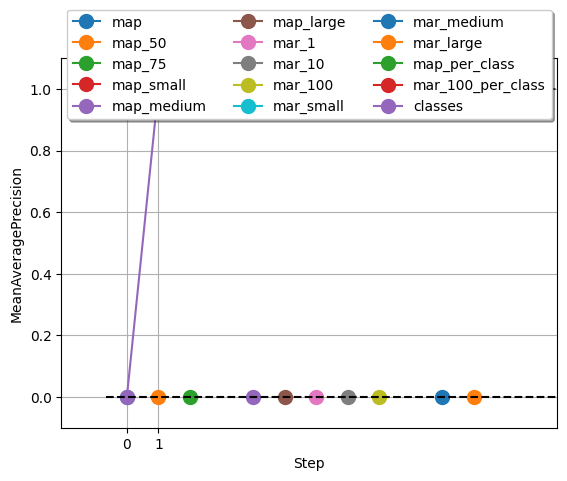

In [102]:
fig_, ax_ = metric.plot()
plt.show()

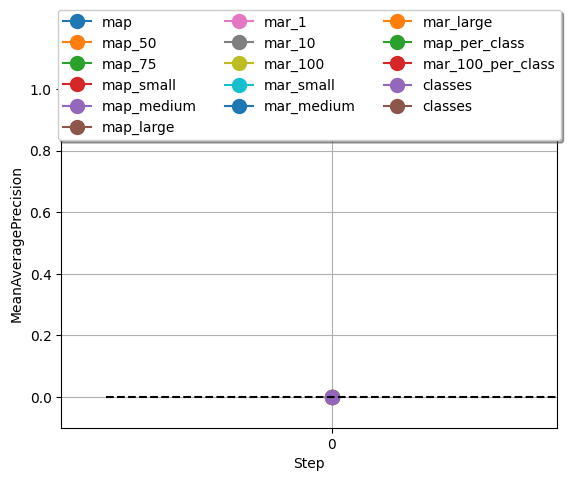

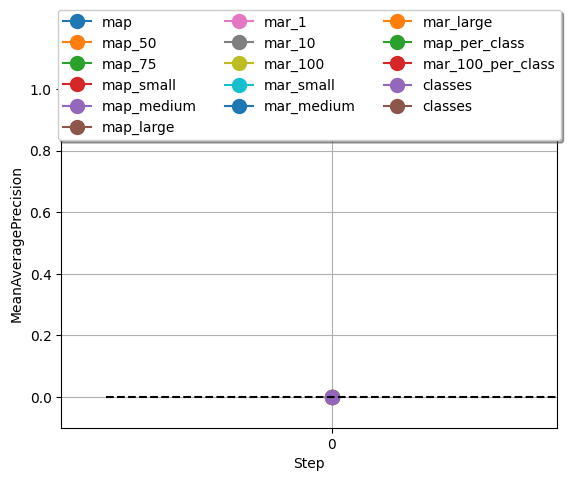

In [105]:
metric.plot(test_loss_list)
plt.show()

In [106]:
img = (test_data[3][0] * 220).type(torch.ByteTensor)
boxes = predictions[0]["boxes"]

In [107]:
img.shape

torch.Size([3, 801, 1200])

/var/folders/p8/bmd8tl011hg8pnsxb1z09wqh0000gn/T/ipykernel_55200/645839679.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  annotated_image = utils.draw_bounding_boxes(torch.tensor(img), boxes, colors="yellow", width=3)


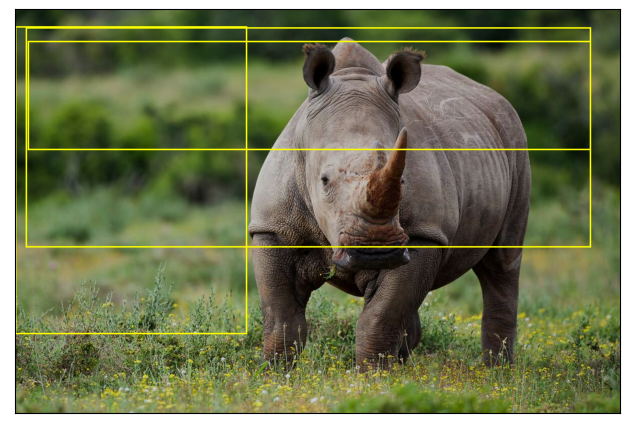

In [108]:
annotated_image = utils.draw_bounding_boxes(torch.tensor(img), boxes, colors="yellow", width=3)

fig, ax = plt.subplots()
ax.imshow(annotated_image.permute(1, 2, 0).numpy())
ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
fig.tight_layout()

plt.show()

In [86]:
train_data[0]

(tensor([[[0.5294, 0.5255, 0.5137,  ..., 0.1216, 0.1255, 0.1255],
          [0.5333, 0.5255, 0.5176,  ..., 0.1255, 0.1216, 0.1216],
          [0.5373, 0.5294, 0.5216,  ..., 0.1216, 0.1216, 0.1176],
          ...,
          [0.4667, 0.4627, 0.4549,  ..., 0.8275, 0.8275, 0.8314],
          [0.6000, 0.6000, 0.6039,  ..., 0.7961, 0.7961, 0.8000],
          [0.6745, 0.6745, 0.6863,  ..., 0.7490, 0.7608, 0.7765]],
 
         [[0.5608, 0.5569, 0.5451,  ..., 0.2196, 0.2235, 0.2235],
          [0.5647, 0.5569, 0.5490,  ..., 0.2235, 0.2196, 0.2196],
          [0.5686, 0.5608, 0.5569,  ..., 0.2196, 0.2196, 0.2235],
          ...,
          [0.3961, 0.3922, 0.3804,  ..., 0.8157, 0.8235, 0.8275],
          [0.5216, 0.5255, 0.5176,  ..., 0.7882, 0.7922, 0.8000],
          [0.5843, 0.5882, 0.5882,  ..., 0.7412, 0.7608, 0.7765]],
 
         [[0.2235, 0.2196, 0.2078,  ..., 0.0941, 0.0980, 0.0980],
          [0.2275, 0.2196, 0.2118,  ..., 0.0980, 0.0941, 0.0941],
          [0.2314, 0.2235, 0.2078,  ...,

In [92]:
len(train_data)

23

In [93]:
img = (train_data[20][0] * 220).type(torch.ByteTensor)
boxes = train_data[20][1]["boxes"]

/var/folders/p8/bmd8tl011hg8pnsxb1z09wqh0000gn/T/ipykernel_55200/645839679.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  annotated_image = utils.draw_bounding_boxes(torch.tensor(img), boxes, colors="yellow", width=3)


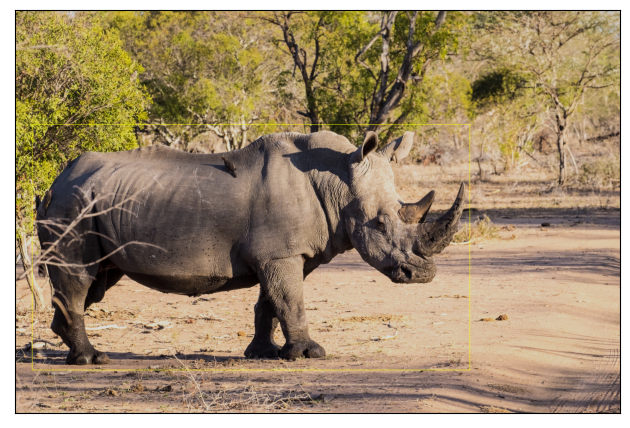

In [94]:
annotated_image = utils.draw_bounding_boxes(torch.tensor(img), boxes, colors="yellow", width=3)

fig, ax = plt.subplots()
ax.imshow(annotated_image.permute(1, 2, 0).numpy())
ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
fig.tight_layout()

plt.show()